In [28]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [16]:
# print files in the current directory
for file in Path('.').iterdir():
    if file.is_file():
        print(file.name)

plots.ipynb
relaxed_cvar_tradeoff.ipynb
gradient_experiments.ipynb


In [63]:
# k-rec results
base_path = Path("../../results/1746445476")

mean_results = [
    "mean_usage_group_500_200_1_0_0.1_0.35_0.5_0.75_1_0.95.json",
    "mean_usage_group_500_200_5_0_0.1_0.35_0.5_0.75_1_0.95.json",
    "mean_usage_group_500_200_10_0_0.1_0.35_0.5_0.75_1_0.95.json",
]

parsed_problem_results = {
    "mean": {},
    "min": {},
}

for (result, k_rec) in zip(mean_results, [1, 5, 10]):
    with open(base_path / result) as f:
        data = json.load(f)
        problem_results = data["results"]["usage_group"][1]["0.95"]
        max_consumer_util_results = problem_results["0"]
        for gamma, results in problem_results.items():
            normalized_values =  np.array(results) / np.array(max_consumer_util_results)
            problem_results[gamma] = {
                "mean": np.mean(normalized_values),
                "std": np.std(normalized_values),
            }

        parsed_problem_results["mean"][k_rec] = problem_results



min_results = [
    "min_usage_group_500_200_1_0_0.1_0.35_0.5_0.75_1_0.95.json",
    "min_usage_group_500_200_5_0_0.1_0.35_0.5_0.75_1_0.95.json",
    "min_usage_group_500_200_10_0_0.1_0.35_0.5_0.75_1_0.95.json",
]

for (result, k_rec) in zip(min_results, [1, 5, 10]):
    with open(base_path / result) as f:
        data = json.load(f)
        problem_results = data["results"]["usage_group"][1]["0.95"]
        print(problem_results)
        max_consumer_util_results = problem_results["0"]
        for gamma, results in problem_results.items():
            normalized_values =  np.array(results) / np.array(max_consumer_util_results)
            problem_results[gamma] = {
                "mean": np.mean(normalized_values),
                "std": np.std(normalized_values),
            }

        parsed_problem_results["min"][k_rec] = problem_results

parsed_problem_results["min"]

{'0': [0.787380062535756, 0.833317326425081, 0.7278377529226838], '0.1': [0.787380062535756, 0.833317326425081, 0.7278377529226838], '0.35': [0.787380062535756, 0.833317326425081, 0.7278377529226838], '0.5': [0.787380062535756, 0.833317326425081, 0.7278377529226838], '0.75': [0.787380062535756, 0.833317326425081, 0.7278377529226838], '1': [0.787380062535756, 0.833317326425081, 0.7278377529226838]}
{'0': [3.7133667714765553, 3.8683400886104273, 3.477477698274753], '0.1': [3.7133667714765553, 3.8683400886104273, 3.477477698274753], '0.35': [3.7133667714765553, 3.8683400886104273, 3.477477698274753], '0.5': [3.7133667714765553, 3.8683400886104273, 3.477477698274753], '0.75': [3.7133667714765553, 3.8683400886104273, 3.477477698274753], '1': [3.7133667714765553, 3.8683400886104273, 3.477477698274753]}
{'0': [7.216245866768431, 7.4937662041711315, 6.5122414474284565], '0.1': [7.216245866768431, 7.4937662041711315, 6.5122414474284565], '0.35': [7.216245866768431, 7.4937662041711315, 6.5122414

{1: {'0': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.1': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.35': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.5': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.75': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '1': {'mean': np.float64(1.0), 'std': np.float64(0.0)}},
 5: {'0': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.1': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.35': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.5': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.75': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '1': {'mean': np.float64(1.0), 'std': np.float64(0.0)}},
 10: {'0': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.1': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.35': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.5': {'mean': np.float64(1.0), 'std': np.float64(0.0)},
  '0.75': {'mean': np.float64(1.0

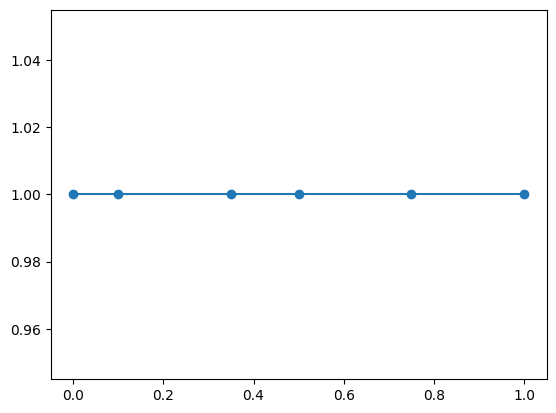

In [65]:
x = [float(key) for key, _ in parsed_problem_results["min"][1].items()]
y = [val["mean"] for _, val in parsed_problem_results["min"][1].items()]

plt.plot(x, y, label="k-rec min", marker="o")